In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

In [5]:
#the digits dataset of 8x8 pixel image of digets that consists in training and target dataset

digits= datasets.load_digits()
n_samples= len(digits.images)
dimention = digits.images[0].shape
print("The number of samples in digits dataset is {0:d},the dimention of each image is{1:d}x{1:d}".format(n_samples, dimention[0]))
#{first postions, double}

The number of samples in digits dataset is 1797,the dimention of each image is8x8


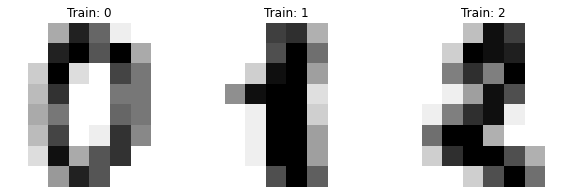

In [7]:
#show the first 3 images
#using a for loop that will plor the images inthe same row next to eachother
#model learns the pattern according to the intesity of the pizels and how its arranged 

_, fig = plt.subplots(nrows=1, ncols=3, figsize= (10,10))
for ax, image, label in zip(fig, digits.images, digits.target): 
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title("Train: %i" % label)

In [8]:
#reshape the images into a vector nx1: from 8x8 imagae to 64x1 vector

data= digits.images.reshape((n_samples, -1))

x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size= 0.2, shuffle= False, random_state=42)



In [9]:
#train the model MLPC using the training subset

model= MLPClassifier(solver="adam", hidden_layer_sizes=(10,12), random_state=1,max_iter=600)

model.fit(x_train,y_train)

classification_results= model.predict(x_test)

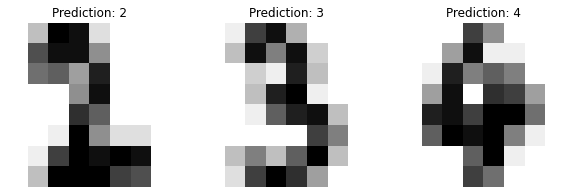

In [11]:
_, fig = plt.subplots(nrows=1, ncols=3, figsize= (10,10))
for ax, image, label in zip(fig, x_test, classification_results): 
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title("Prediction: %i" % label)

In [12]:
print(metrics.classification_report(classification_results,y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       0.78      0.76      0.77        37
           2       0.91      0.91      0.91        35
           3       0.84      0.91      0.87        34
           4       0.92      0.89      0.91        38
           5       0.95      0.83      0.89        42
           6       0.92      0.94      0.93        36
           7       0.83      0.94      0.88        32
           8       0.76      0.81      0.78        31
           9       0.86      0.78      0.82        41

    accuracy                           0.88       360
   macro avg       0.87      0.88      0.87       360
weighted avg       0.88      0.88      0.87       360

